In this data set we will looking for the miles per gallon, like which car would give us better efficency when we compare criterias like cylinders, displacement, horsepower etc
and this is the regression data type as the target mpg has continuous values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [24]:
mp=pd.read_csv('mpg.csv')
mp.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,"chevrolet,chevelle,malibu"
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,"buick,skylark,320"
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,"plymouth,satellite"
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,"amc,rebel,sst"
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,"ford,torino"
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,"ford,galaxie,500"
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,"chevrolet,impala"
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,"plymouth,fury,iii"
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,"pontiac,catalina"
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,"amc,ambassador,dpl"


In [25]:
mp.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name         object
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mp['car name']=le.fit_transform(mp['car name'])

In [29]:
mp.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,50
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,37
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,235
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,14
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,164
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,143
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,55
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,227
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,246
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,1


The data is already small and looks clean, still we check for the null values, 
skewness and outliers and try to remove or reduce them to the extent possible.

In [26]:
mp.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [30]:
mp['mpg']=mp['mpg'].fillna(mp['mpg'].mode()[0])
mp['horsepower']=mp['horsepower'].fillna(mp['horsepower'].mode()[0])

In [32]:
mp.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

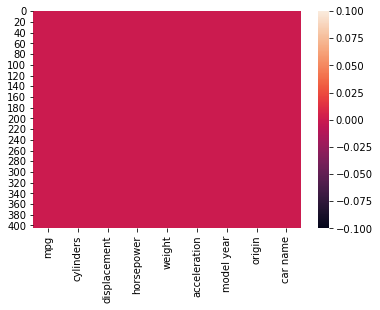

In [34]:
sns.heatmap(mp.isnull())

In [35]:
mp.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.307389,5.475369,194.779557,105.746305,2979.413793,15.519704,75.921182,1.568966,151.679803
std,7.875513,1.712160,104.922458,38.861288,847.004328,2.803359,3.748737,0.797479,91.537112
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000,1.000000,66.250000
50%,22.350000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000,152.000000
75%,29.000000,8.000000,302.000000,131.500000,3618.250000,17.175000,79.000000,2.000000,230.750000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,311.000000


In [36]:
mp.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1.000000,-0.765202,-0.794420,-0.747748,-0.822918,0.424857,0.586952,0.557705,0.265880
cylinders,-0.765202,1.000000,0.951787,0.820487,0.895220,-0.522452,-0.360762,-0.567478,-0.279409
displacement,-0.794420,0.951787,1.000000,0.875217,0.932475,-0.557984,-0.381714,-0.613056,-0.295416
horsepower,-0.747748,0.820487,0.875217,1.000000,0.844527,-0.674515,-0.406150,-0.459105,-0.234776
weight,-0.822918,0.895220,0.932475,0.844527,1.000000,-0.430086,-0.315389,-0.584109,-0.260642
acceleration,0.424857,-0.522452,-0.557984,-0.674515,-0.430086,1.000000,0.301992,0.218845,0.133940
model year,0.586952,-0.360762,-0.381714,-0.406150,-0.315389,0.301992,1.000000,0.187656,0.080746
origin,0.557705,-0.567478,-0.613056,-0.459105,-0.584109,0.218845,0.187656,1.000000,0.362324
car name,0.265880,-0.279409,-0.295416,-0.234776,-0.260642,0.133940,0.080746,0.362324,1.000000


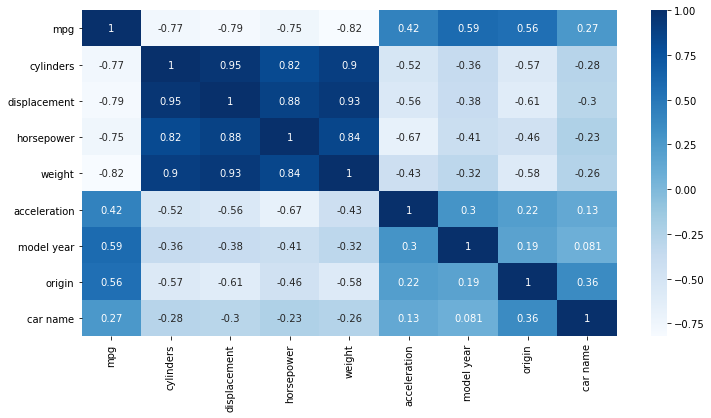

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(mp.corr(), cmap='Blues', annot=True)

In [38]:
mp.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name          int32
dtype: object

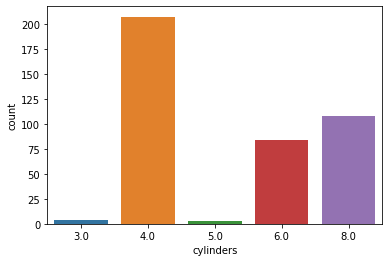

In [39]:
sns.countplot(x='cylinders', data=mp)

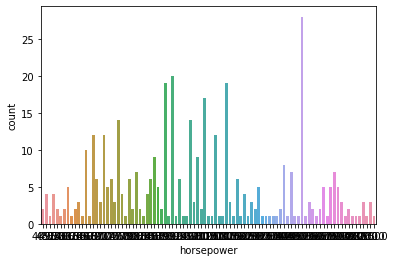

In [41]:
sns.countplot(x='horsepower', data=mp)

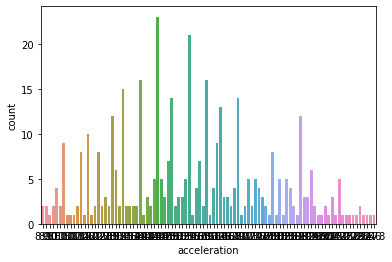

In [42]:
sns.countplot(x='acceleration', data=mp)

In [43]:
mp.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name          int32
dtype: object

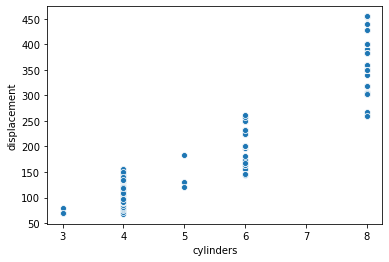

In [45]:
sns.scatterplot(x='cylinders', y='displacement', data=mp )

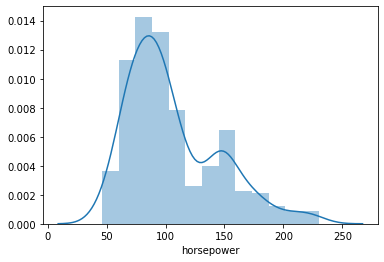

In [46]:
sns.distplot(mp['horsepower'])

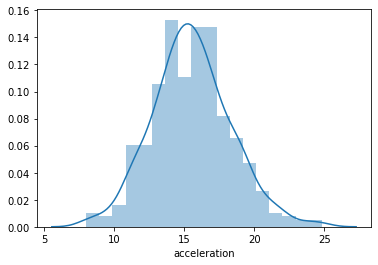

In [48]:
sns.distplot(mp['acceleration'])

In [49]:
mp.skew()

mpg             0.470001
cylinders       0.506356
displacement    0.694130
horsepower      0.982913
weight          0.505684
acceleration    0.230224
model year      0.020912
origin          0.932399
car name        0.024425
dtype: float64

In [50]:
mg=mp.copy()

(array([ 28.,  95., 120.,  46.,  19.,  55.,  14.,  16.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

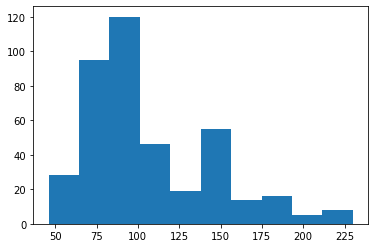

In [53]:
plt.hist(mp['horsepower'],bins=10)

In [51]:
mg['horsepower']=np.log1p(mg['horsepower'])

(array([14., 13., 59., 63., 96., 48., 27., 51., 22., 13.]),
 array([3.8501476 , 4.00937461, 4.16860162, 4.32782863, 4.48705565,
        4.64628266, 4.80550967, 4.96473668, 5.12396369, 5.2831907 ,
        5.44241771]),
 <a list of 10 Patch objects>)

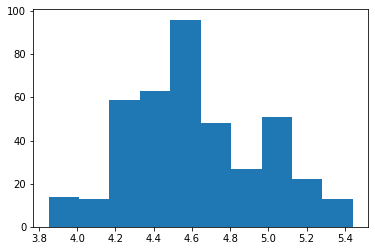

In [54]:
plt.hist(mg['horsepower'], bins=10)

In the above figure we can clearly see before and after removing the skewness of the horse power what type of change it has.

In [52]:
mg.skew()

mpg             0.470001
cylinders       0.506356
displacement    0.694130
horsepower      0.298271
weight          0.505684
acceleration    0.230224
model year      0.020912
origin          0.932399
car name        0.024425
dtype: float64

Now we are going to check for the outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0xeb2b160>,
 'caps': [<matplotlib.lines.Line2D at 0xeb2b820>,
 'boxes': [<matplotlib.lines.Line2D at 0xdb4bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0xeb2bee0>],
 'fliers': [<matplotlib.lines.Line2D at 0xeb34220>],
 'means': []}

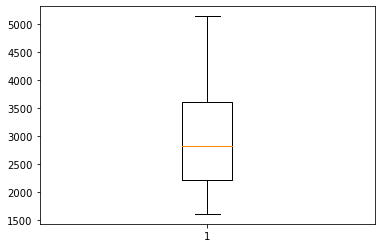

In [55]:
plt.boxplot(mg['weight'])

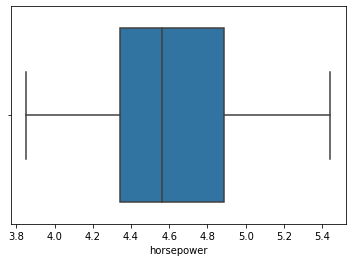

In [56]:
sns.boxplot(mg['horsepower'])

{'whiskers': [<matplotlib.lines.Line2D at 0xd9204f0>,
 'caps': [<matplotlib.lines.Line2D at 0xd8b20a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd8d0a90>],
 'medians': [<matplotlib.lines.Line2D at 0xbe8b580>],
 'fliers': [<matplotlib.lines.Line2D at 0xbe2d8e0>],
 'means': []}

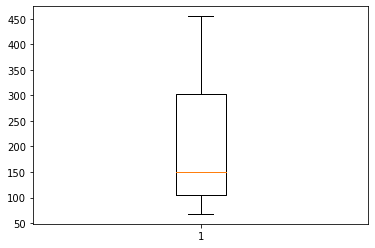

In [57]:
plt.boxplot(mg['displacement'])

we basically dont require model year, origin and car name to decide the miles per gallon of car,
so we can delete the coulmns which are of not as much use to predict the mpg

In [61]:
mn=mg.drop(['model year','origin','car name'], axis=1)
mn

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,4.875197,3504.0,12.0
1,15.0,8.0,350.0,5.111988,3693.0,11.5
2,18.0,8.0,318.0,5.017280,3436.0,11.0
3,16.0,8.0,304.0,5.017280,3433.0,12.0
4,17.0,8.0,302.0,4.948760,3449.0,10.5
...,...,...,...,...,...,...
401,27.0,4.0,140.0,4.465908,2790.0,15.6
402,44.0,4.0,97.0,3.970292,2130.0,24.6
403,32.0,4.0,135.0,4.442651,2295.0,11.6
404,28.0,4.0,120.0,4.382027,2625.0,18.6


In [62]:
from scipy.stats import zscore
z=np.abs(zscore(mn))
mpg=mn[(z<3).all(axis=1)]
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,4.875197,3504.0,12.0
1,15.0,8.0,350.0,5.111988,3693.0,11.5
2,18.0,8.0,318.0,5.017280,3436.0,11.0
3,16.0,8.0,304.0,5.017280,3433.0,12.0
4,17.0,8.0,302.0,4.948760,3449.0,10.5
...,...,...,...,...,...,...
400,27.0,4.0,151.0,4.510860,2950.0,17.3
401,27.0,4.0,140.0,4.465908,2790.0,15.6
403,32.0,4.0,135.0,4.442651,2295.0,11.6
404,28.0,4.0,120.0,4.382027,2625.0,18.6


In [65]:
x=mpg.drop('mpg', axis=1)
y=mpg.iloc[:,0]

In [68]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for r_state in range(1,60):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=r_state, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 47 to the r2 Score is 0.7157981051334549


In [71]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=47, test_size=0.20)
ln=LinearRegression()
ln.fit(x_train,y_train)
y_pred=ln.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
r2_scr

0.7157981051334549

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(ln,x,y,scoring='r2', cv=10).mean()
cross_val_scr

0.37181319052250306

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.35272766636710906
{'alpha': 0.001}
0.3516364207871181


In [75]:
rg=Ridge(alpha=1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
pred_y=rg.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))

r2 score 0.7156737436751835
16.2044103324006


In [76]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))

r2 score 0.7158061111075338
16.19686640657336


In [77]:
df1=pd.DataFrame(pred_y)
df1.to_csv('lr_mpg.csv')

In [78]:
import joblib
joblib.dump(lr,'lr_mpg.pkl')

['lr_mpg.pkl']

In [ ]:
mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name